In [1]:
import datetime
import pandas as pd
import shioaji as sj
from winsound import Beep
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates

2024-11-02 20:50:49.082 | WARNING  | importlib._bootstrap:_call_with_frames_removed:228 - Optional: pip install shioaji[speed] for better performance.
Duplicate key in file WindowsPath('d:/source/Anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  Microsoft JhengHei')


In [2]:
MYM_df = pd.read_parquet(f"datas/02.IB下載09月24日-10月23日的MYM一分鐘價.pqt")
MYM_df

,Close
Date,
2024-09-24 06:00:00,42477.0
2024-09-24 06:01:00,42472.0
2024-09-24 06:02:00,42477.0
2024-09-24 06:03:00,42482.0
2024-09-24 06:04:00,42476.0
...,...
2024-10-24 04:34:00,42672.0
2024-10-24 04:35:00,42690.0
2024-10-24 04:36:00,42686.0


In [3]:
UDF_df = pd.read_parquet(f"datas/02.SJ下載09月24日-10月23日的UDF逐筆成交明細.pqt")
UDF_df

,ts,close,bid_price,ask_price
0,2024-09-23 15:04:06.310000128,42409.0,42409.0,42414.0
1,2024-09-23 15:05:19.228999936,42421.0,42408.0,42422.0
2,2024-09-23 15:07:08.268000000,42404.0,42400.0,42406.0
3,2024-09-23 15:07:15.608999936,42404.0,42392.0,42406.0
4,2024-09-23 15:08:04.516999936,42395.0,42388.0,42395.0
...,...,...,...,...
418,2024-10-22 13:39:41.985999872,43142.0,43142.0,43152.0
419,2024-10-22 13:39:41.985999872,43142.0,43142.0,43152.0
420,2024-10-22 13:39:46.528000000,43152.0,43145.0,43152.0
421,2024-10-22 13:41:01.920999936,43153.0,43143.0,43156.0


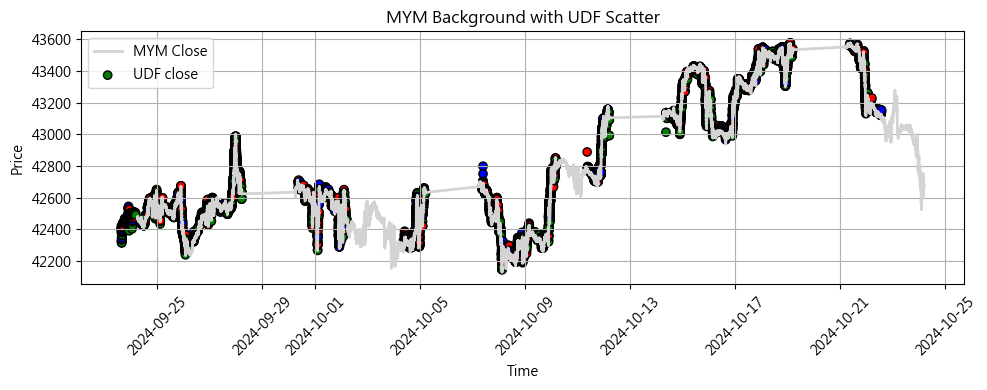

In [4]:
%matplotlib inline
# 畫圖
plt.figure(figsize=(10, 4))

# 先畫背景的 MYM_df
plt.plot(
    MYM_df.index, MYM_df["Close"], label="MYM Close", color="lightgray", linewidth=2
)

# 繪製 UDF_df 的逐筆成交 (scatter)
colors = [
    "red" if close == ask else "green" if close == bid else "blue"
    for close, bid, ask in zip(
        UDF_df["close"], UDF_df["bid_price"], UDF_df["ask_price"]
    )
]
plt.scatter(
    UDF_df["ts"], UDF_df["close"], c=colors, label="UDF close", edgecolor="black"
)

# 添加圖例和標籤
plt.title("MYM Background with UDF Scatter")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
#這是上面那張圖的qt版本
%matplotlib 
# %matplotlib inline
# 畫圖
plt.figure(figsize=(10, 4))

# 先畫背景的 MYM_df
plt.plot(
    MYM_df.index, MYM_df["Close"], label="MYM Close", color="lightgray", linewidth=2
)

# 繪製 UDF_df 的逐筆成交 (scatter)
colors = [
    "red" if close == ask else "green" if close == bid else "blue"
    for close, bid, ask in zip(
        UDF_df["close"], UDF_df["bid_price"], UDF_df["ask_price"]
    )
]
plt.scatter(
    UDF_df["ts"], UDF_df["close"], c=colors, label="UDF close", edgecolor="black"
)

# 添加圖例和標籤
plt.title("MYM Background with UDF Scatter")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Using matplotlib backend: QtAgg


In [ ]:

# %matplotlib inline
%matplotlib 
plt.figure(figsize=(10, 4))

MYM_df=MYM_df.resample('5Min').last()
MYM_df["Date"] = pd.to_datetime(MYM_df.index)
MYM_df.set_index("Date", inplace=True)
# 計算每分鐘的漲跌變化
MYM_df["Change"] = MYM_df["Close"].diff()

# 定義前一分鐘和當前分鐘的趨勢
MYM_df["Previous_Change"] = MYM_df["Change"].shift(1)
MYM_df["Current_Trend"] = MYM_df["Change"].apply(
    lambda x: "Up" if x > 0 else ("Down" if x < 0 else "Same")
)

# 排除NaN值
MYM_df.dropna(inplace=True)

# 計算前一分鐘變化與當前趨勢的對應關係
trend_stats = (
    MYM_df.groupby("Previous_Change")["Current_Trend"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

# 繪製趨勢轉移的機率圖表
fig, ax = plt.subplots()

# 繪製上漲和下跌的機率分佈
ax.plot(trend_stats.index, trend_stats["Up"], label="Next Minute Up", marker="o")
ax.plot(trend_stats.index, trend_stats["Down"], label="Next Minute Down", marker="x")

# 設置圖表標題與標籤
ax.set_title("Probability of Next Minute Trend Based on Previous Minute Change")
ax.set_xlabel("Previous Minute Change (Points)")
ax.set_ylabel("Probability")
ax.legend()

# 顯示圖表
plt.grid(True)
plt.show()

Using matplotlib backend: QtAgg


d:\source\Anaconda\lib\site-packages\ipykernel\eventloops.py:107: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  app.exec_()


d:\source\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


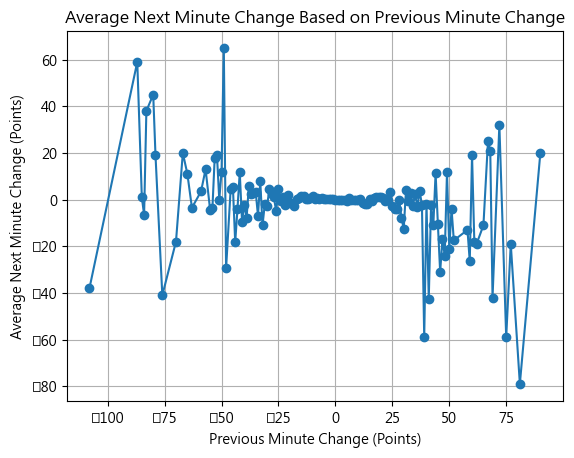

In [25]:
%matplotlib inline
MYM_df["Date"] = pd.to_datetime(MYM_df.index)
MYM_df.set_index("Date", inplace=True)

# 計算每分鐘的漲跌變化
MYM_df["Change"] = MYM_df["Close"].diff()

# 定義前一分鐘和當前分鐘的變化
MYM_df["Previous_Change"] = MYM_df["Change"].shift(1)
MYM_df["Current_Change"] = MYM_df["Change"]

# 排除 NaN 值
MYM_df.dropna(inplace=True)

# 計算前一分鐘變化與下一分鐘變化的平均值
avg_next_change = MYM_df.groupby("Previous_Change")["Current_Change"].mean()

# 繪製趨勢轉移的機率圖表
fig, ax = plt.subplots()

# 繪製前一分鐘漲跌數值與下一分鐘的漲跌平均值
ax.plot(avg_next_change.index, avg_next_change, marker="o")

# 設置圖表標題與標籤
ax.set_title("Average Next Minute Change Based on Previous Minute Change")
ax.set_xlabel("Previous Minute Change (Points)")
ax.set_ylabel("Average Next Minute Change (Points)")

# 顯示圖表
plt.grid(True)
plt.show()

d:\source\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


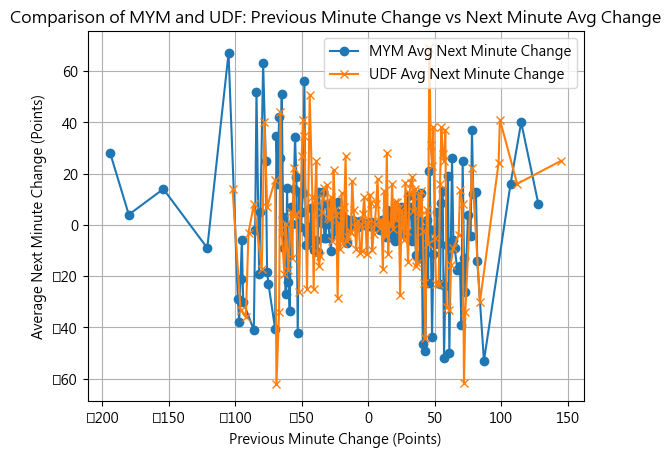

In [42]:
# %matplotlib 
%matplotlib inline

UDF_df["Date"] = pd.to_datetime(UDF_df["ts"])
UDF_df.set_index("Date", inplace=True)
UDF_df=UDF_df.resample('5Min').last()
MYM_df=MYM_df.resample('5Min').last()

# 計算 MYM_df 和 UDF_df 每分鐘的漲跌變化
MYM_df["Change"] = MYM_df["Close"].diff()
UDF_df["Change"] = UDF_df["close"].diff()

# 定義前一分鐘和當前分鐘的變化
MYM_df["Previous_Change"] = MYM_df["Change"].shift(1)
MYM_df["Current_Change"] = MYM_df["Change"]

UDF_df["Previous_Change"] = UDF_df["Change"].shift(1)
UDF_df["Current_Change"] = UDF_df["Change"]

# 排除 NaN 值
MYM_df.dropna(inplace=True)
UDF_df.dropna(inplace=True)

# 計算 MYM_df 和 UDF_df 前一分鐘變化與下一分鐘變化的平均值
avg_next_change_mym = MYM_df.groupby("Previous_Change")["Current_Change"].mean()
avg_next_change_udf = UDF_df.groupby("Previous_Change")["Current_Change"].mean()

# 繪製疊加圖
fig, ax = plt.subplots()

# 繪製 MYM_df 的前一分鐘變化與下一分鐘平均變化
ax.plot(
    avg_next_change_mym.index,
    avg_next_change_mym,
    label="MYM Avg Next Minute Change",
    marker="o",
)

# 繪製 UDF_df 的前一分鐘變化與下一分鐘平均變化
ax.plot(
    avg_next_change_udf.index,
    avg_next_change_udf,
    label="UDF Avg Next Minute Change",
    marker="x",
)

# 設置圖表標題與標籤
ax.set_title(
    "Comparison of MYM and UDF: Previous Minute Change vs Next Minute Avg Change"
)
ax.set_xlabel("Previous Minute Change (Points)")
ax.set_ylabel("Average Next Minute Change (Points)")
ax.legend()

# 顯示圖表
plt.grid(True)
plt.show()

In [62]:
%matplotlib 
# 讀取數據
MYM_df = pd.read_parquet(f"datas/02.IB下載09月24日-10月23日的MYM一分鐘價.pqt")

def analyze_volatility(df):
    # Convert string to datetime if needed
    if isinstance(df.index[0], str):
        df.index = pd.to_datetime(df.index)

    # Create time groups
    df["time"] = df.index.time
    df["date"] = df.index.date

    # Function to create 5-minute time bins
    def get_5min_bin(t):
        hour = t.hour
        minute = (t.minute // 5) * 5
        return f"{hour:02d}:{minute:02d}"

    # Add time bin column
    df["time_bin"] = df.index.map(lambda x: get_5min_bin(x))

    # Calculate standard deviation for each time bin across all days
    volatility_by_time = df.groupby("time_bin")["Close"].std()

    # Sort by time for proper plotting
    volatility_by_time = volatility_by_time.sort_index()

    # Create visualization
    plt.figure(figsize=(15, 6))
    plt.plot(range(len(volatility_by_time)), volatility_by_time.values, marker="o")

    # Customize x-axis
    plt.xticks(range(len(volatility_by_time)), volatility_by_time.index, rotation=45)
    plt.grid(True, linestyle="--", alpha=0.7)

    # Labels and title
    plt.xlabel("Time of Day")
    plt.ylabel("Price Volatility (Standard Deviation)")
    plt.title("Price Volatility Pattern Throughout the Day")

    # Find highest and lowest volatility periods
    highest_vol = volatility_by_time.nlargest(5)
    lowest_vol = volatility_by_time.nsmallest(5)

    return {
        "volatility_data": volatility_by_time,
        "highest_volatility": highest_vol,
        "lowest_volatility": lowest_vol,
        "plot": plt,
    }


# Example usage:
# Assuming your data is in a DataFrame called MYM_df with datetime index
# Convert the string dates to datetime index if needed
# df = pd.read_csv(
#     "your_data.csv", parse_dates=["Date"], index_col="Date"
# )  # Modify as needed

results = analyze_volatility(MYM_df)

# Print results
print("\nHighest volatility periods:")
print(results["highest_volatility"])
print("\nLowest volatility periods:")
print(results["lowest_volatility"])

# Show plot
plt.tight_layout()
plt.show()

Using matplotlib backend: QtAgg

Highest volatility periods:
time_bin
02:30    421.003496
02:20    419.892703
15:45    418.902089
01:40    418.842149
01:10    418.813644
Name: Close, dtype: float64

Lowest volatility periods:
time_bin
21:10    358.292791
22:00    360.081488
22:05    360.707096
21:05    361.062442
21:25    361.262179
Name: Close, dtype: float64


In [64]:
MYM_df["Date"] = pd.to_datetime(MYM_df.index)
MYM_df.set_index("Date", inplace=True)


# 定義計算標準差的函數
def calculate_std(df, start_time, end_time):
    period_df = df.between_time(start_time, end_time)
    return period_df["Close"].std()


# 生成一整天的時間段，每隔五分鐘
time_periods = [
    (f"{hour:02d}:{minute:02d}", f"{hour:02d}:{minute+4:02d}")
    for hour in range(24)
    for minute in range(0, 60, 5)
]

# 計算每個時間段的標準差
std_devs = [calculate_std(MYM_df, start, end) for start, end in time_periods]

# 繪製圖表
times = [f"{start}-{end}" for start, end in time_periods]
plt.figure(figsize=(15, 7))
plt.plot(times, std_devs, marker="o")
plt.xlabel("Time Period")
plt.ylabel("Standard Deviation of Volatility")
plt.title("Volatility Standard Deviation Over Different Time Periods")
plt.xticks(rotation=90)  # 旋轉橫軸標籤以便閱讀
plt.grid(True)
plt.tight_layout()  # 自動調整佈局以防止標籤重疊
plt.show()